# __Springboard Data Science Capstone 3 Project__
# ___Predicting the Price of Energy___

### __Exploratory Data Analysis__

##### ___Ben Takacs___
###### __Python version 3.10.4__

### __Imports and File Location__

In [24]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from functions import load_csv_data

In [25]:
df43 = load_csv_data('df43.csv')
df98 = load_csv_data('df98.csv')

Data loaded from: df43.csv
Data loaded from: df98.csv


### __Table 9.8 - Average Price of Electricity to Ultimate Customers__

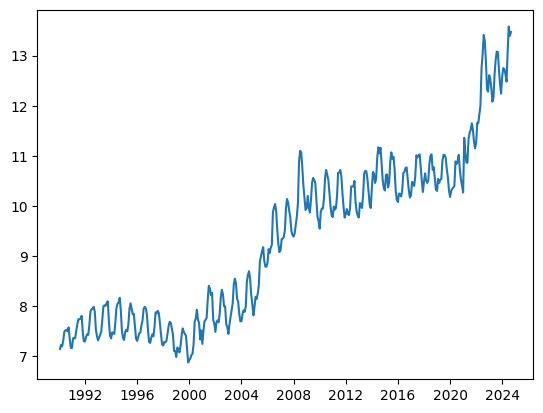

In [26]:
y98 = df98['Average Price of Electricity to Ultimate Customers, Commercial']

plt.figure()
plt.plot(y98)
plt.show()

To perform ARIMA analysis, must check that data is stationary.

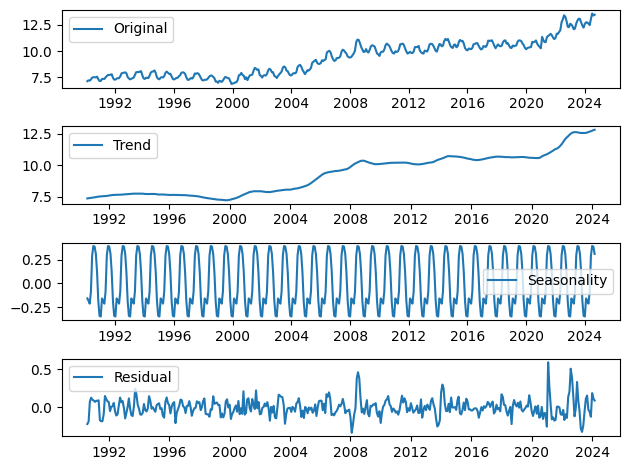

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Plot the original data, the trend, the seasonality, and the residuals 
decomp = seasonal_decompose(y98, model='additive')

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

plt.subplot(411)
plt.plot(y98, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### __Table 4.3 - Consumption by Sector__

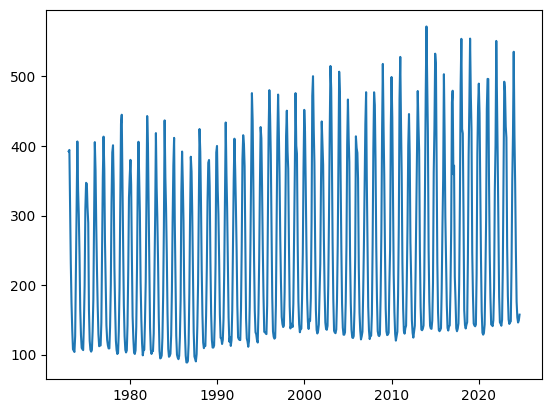

In [28]:
y43 = df43['Natural Gas Consumed by the Commercial Sector']

plt.figure()
plt.plot(y43)
plt.show()

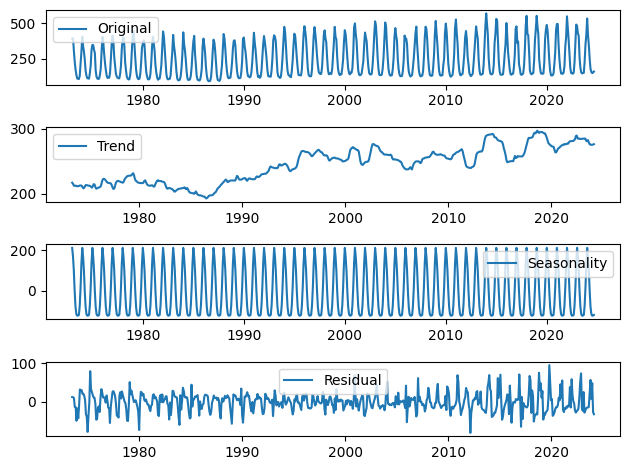

In [29]:
# Plot the original data, the trend, the seasonality, and the residuals 
decomp = seasonal_decompose(y43, model='additive')

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

plt.subplot(411)
plt.plot(y43, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [30]:
from statsmodels.tsa.stattools import kpss
kpss(y43)

(2.1349822118670936,
 0.01,
 0,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

(0.0035354076699120507,
 0.1,
 3,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

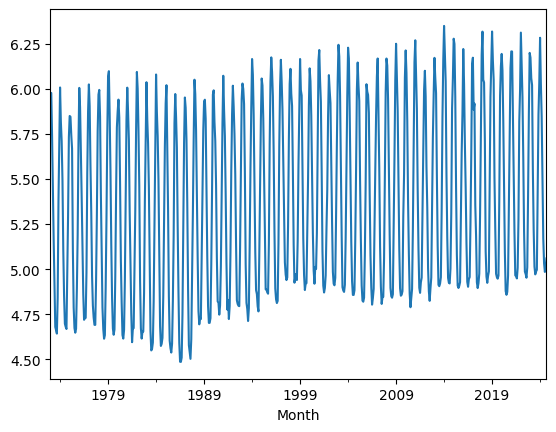

In [31]:
ylog = np.log(y43)
ylog.plot()

ylogdiff = ylog.diff().dropna()
kpss(ylogdiff)

In [32]:
# Import mean_squared_error and ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

def arima_mse(data, order):
    split = int(len(data) * 0.8)
    train, test = data[0:split], data[split:]
    past = [x for x in train]

    predictions = list()
    for i in range(len(test)):
        model = ARIMA(past, order=order)
        model_fit = model.fit()
        future = model_fit.forecast()[0]
        predictions.append(future)
        past.append(test[i])

    error = mean_squared_error(test, predictions)
    
    return error

# Make a function to evaluate different ARIMA models with several different p, d, and q values.
def model_eval(data, pvals, dvals, qvals):
    best_score, best_cfg = float('inf'), None
    for p in pvals:
        for d in dvals:
            for q in qvals:
                order = (p, d, q)
                try:
                    mse = arima_mse(data, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3E' % (order, mse))
                    
                except:
                    continue
    print('Best ARIMA%s MSE=%.3E' % (best_cfg, best_score))
    return best_cfg

In [33]:
# Now, we choose a couple of values to try for each parameter.
pvals = [x for x in range(0, 3)]
dvals = [x for x in range(0, 3)]
qvals = [x for x in range(0, 3)]

# Finally, we can find the optimum ARIMA model for our data.
# Nb. this can take a while...!
import warnings
warnings.filterwarnings("ignore")
bestpdq = model_eval(ylog, pvals, dvals, qvals)

ARIMA(0, 0, 0) MSE=2.587E-01
ARIMA(0, 0, 1) MSE=9.714E-02
ARIMA(0, 0, 2) MSE=6.099E-02
ARIMA(0, 1, 0) MSE=7.566E-02
ARIMA(0, 1, 1) MSE=5.219E-02
ARIMA(0, 1, 2) MSE=4.562E-02
ARIMA(0, 2, 0) MSE=5.195E-02
ARIMA(0, 2, 1) MSE=5.508E-02
ARIMA(0, 2, 2) MSE=5.465E-02
ARIMA(1, 0, 0) MSE=7.037E-02
ARIMA(1, 0, 1) MSE=4.681E-02
ARIMA(1, 0, 2) MSE=3.961E-02
ARIMA(1, 1, 0) MSE=4.325E-02
ARIMA(1, 1, 1) MSE=4.496E-02
ARIMA(1, 1, 2) MSE=4.692E-02
ARIMA(1, 2, 0) MSE=5.560E-02
ARIMA(1, 2, 1) MSE=5.528E-02
ARIMA(1, 2, 2) MSE=5.472E-02
ARIMA(2, 0, 0) MSE=2.742E-02
ARIMA(2, 0, 1) MSE=2.271E-02
ARIMA(2, 0, 2) MSE=2.256E-02
ARIMA(2, 1, 0) MSE=4.585E-02
ARIMA(2, 1, 1) MSE=2.640E-02
ARIMA(2, 1, 2) MSE=1.388E-02
ARIMA(2, 2, 0) MSE=5.468E-02
ARIMA(2, 2, 1) MSE=5.491E-02
ARIMA(2, 2, 2) MSE=3.180E-02
Best ARIMA(2, 1, 2) MSE=1.388E-02


In [34]:
model = ARIMA(ylog, order=bestpdq)
model_fit = model.fit()
forecast = model_fit.forecast(30)
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                             SARIMAX Results                                             
=========================================================================================================
Dep. Variable:     Natural Gas Consumed by the Commercial Sector   No. Observations:                  621
Model:                                            ARIMA(2, 1, 2)   Log Likelihood                 548.255
Date:                                           Tue, 04 Mar 2025   AIC                          -1086.511
Time:                                                   14:04:48   BIC                          -1064.362
Sample:                                               01-01-1973   HQIC                         -1077.902
                                                    - 09-01-2024                                         
Covariance Type:                                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7208      0.006    283.160      0.000       1.709       1.733
ar.L2         -0.9880      0.006   -156.672      0.000      -1.000      -0.976
ma.L1         -1.8019      0.022    -83.164      0.000      -1.844      -1.759
ma.L2          0.8651      0.021     40.331      0.000       0.823       0.907
sigma2         0.0099      0.001     16.663      0.000       0.009       0.011
===================================================================================
Ljung-Box (L1) (Q):                   2.33   Jarque-Bera (JB):                 1.47
Prob(Q):                              0.13   Prob(JB):                         0.48
Heteroskedasticity (H):               1.42   Skew:                            -0.08
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Unfortunately this data is not super well suited to an ARIMA model. MSE is very high and not great Q or JB probabilities.